🎯 **Goal:** Analyze eCommerce transactions dataset, perform EDA, and derive actionable business insights to improve customer engagement and revenue growth.

---

### 📊 **Steps**

#### 1. **Data Exploration and Cleaning**
   - **📝 Task:** Load and inspect `Customers.csv`, `Products.csv`, and `Transactions.csv`.
   - **🔍 Focus Areas:**
     - Handle missing values, duplicate records, and outliers.
     - Ensure correct data types for dates, prices, and quantities.

#### 2. **Exploratory Data Analysis (EDA)**
   - **📝 Task:** Uncover trends and patterns.
   - **📈 Include:**
     - **Customer Analysis:** Signup trends, regional distribution, repeat customers.
     - **Product Analysis:** Most purchased categories, price distribution, and product popularity.
     - **Transaction Analysis:** Sales trends over time, high-value transactions, and quantity insights.
   - **🧩 Tools:** Pandas, Matplotlib, Seaborn, and Plotly for visualizations.

#### 3. **Business Insights (5 Key Findings)**
   


### Import Libraries


In [1]:
# Importing the libraries
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
customers = pd.read_csv("/content/drive/MyDrive/Zeotap/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Zeotap/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Zeotap/Transactions.csv")

# Merge transactions with products to include product details
transactions_with_products = transactions.merge(products, on="ProductID", how="left")

# Merge transactions with customers to include customer details
df = transactions_with_products.merge(customers, on="CustomerID", how="left")

In [11]:
# Convert date columns to datetime format
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
df["SignupDate"] = pd.to_datetime(df["SignupDate"])

In [12]:
df.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   Price_y          1000 non-null   float64       
 10  CustomerName     1000 non-null   object        
 11  Region           1000 non-null   object        
 12  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [14]:
df.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
Price_x,100
ProductName,66
Category,4
Price_y,100


In [15]:
df.isnull().sum() # missing values

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
ProductName,0
Category,0
Price_y,0


 ### Univariate Analysis

<ipython-input-16-d3b450509ee6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


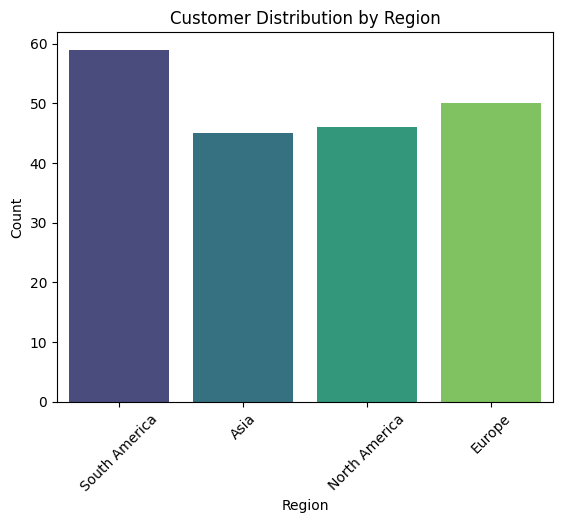

In [16]:
# Region distribution
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-49a31a92b194>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x="Category", palette="cubehelix")


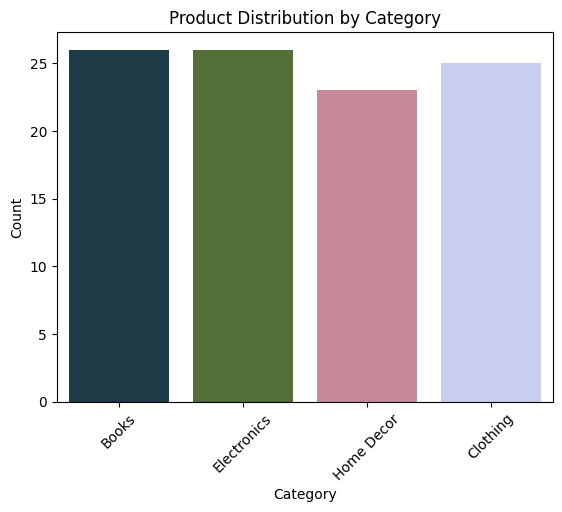

In [17]:
# Product Category Distribution
sns.countplot(data=products, x="Category", palette="cubehelix")
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

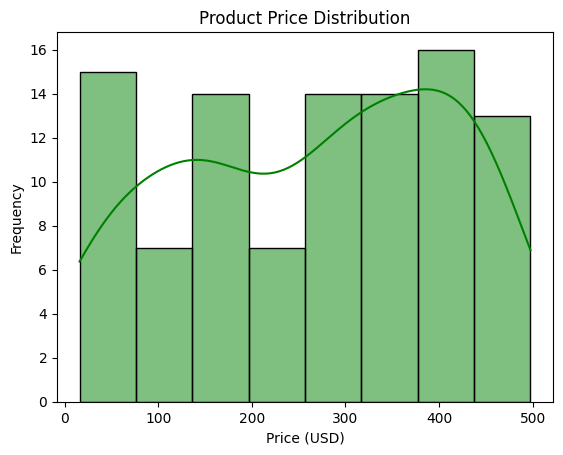

In [18]:
# Product Price Distribution
sns.histplot(products["Price"], kde=True, color="green")
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


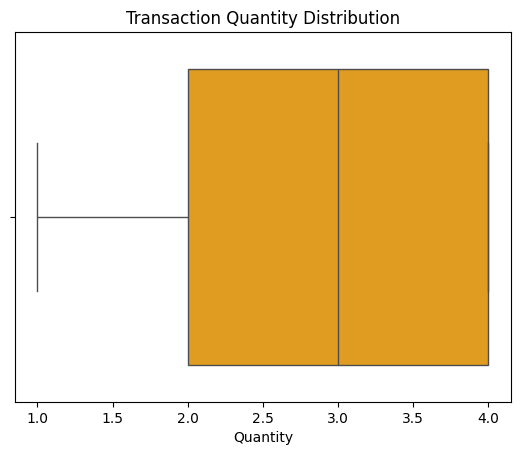

In [19]:
# Transaction Quantity
sns.boxplot(data=transactions, x="Quantity", color="orange")
plt.title("Transaction Quantity Distribution")
plt.xlabel("Quantity")
plt.show()


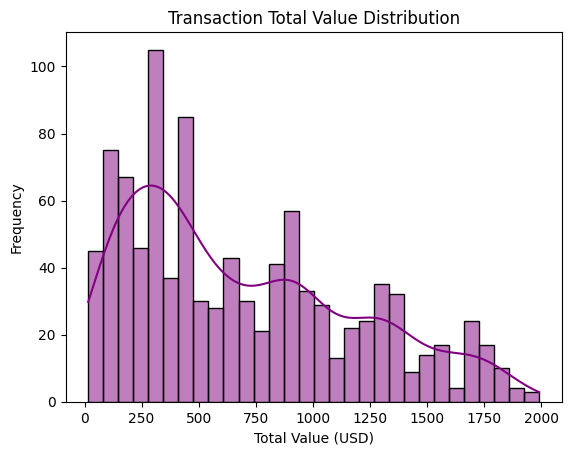

In [20]:
# Total Transaction Value
sns.histplot(transactions["TotalValue"], kde=True, color="purple", bins=30)
plt.title("Transaction Total Value Distribution")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()


### Bivariate Analysis

### Seasonal Sales Trends

In [27]:
df["Month"] = df["TransactionDate"].dt.month
df["Year"] = df["TransactionDate"].dt.year

monthly_sales = df.groupby(["Year", "Month"])["TotalValue"].sum().reset_index()

In [26]:
fig = px.line(
    monthly_sales,
    x="Month",
    y="TotalValue",
    color="Year",
    title="Seasonal Sales Trends",
    labels={"TotalValue": "Total Sales", "Month": "Month"},
    markers=True,
)

fig.update_layout(
    xaxis=dict(tickmode="linear", tick0=1, dtick=1),
    yaxis_title="Total Sales (USD)",
    xaxis_title="Month",
    template="plotly_white",
)
fig.show()

###  Identify High-Revenue Products

In [31]:
product_sales = final_data.groupby(["ProductID", "ProductName"])["TotalValue"].sum().reset_index()
product_sales = product_sales.sort_values(by="TotalValue", ascending=False).head(5)

fig = px.bar(
    product_sales,
    x="ProductName",
    y="TotalValue",
    title="Top 5 High-Revenue Products",
    labels={"TotalValue": "Total Revenue (USD)", "ProductName": "Product Name"},
    color="TotalValue",
    text="TotalValue",
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(template="plotly_white", xaxis_title="Product", yaxis_title="Revenue")
fig.show()

### Customer Segmentation by Region

In [32]:
region_sales = final_data.groupby("Region").agg({
    "TotalValue": "sum",  # Total revenue
    "CustomerID": "nunique"  # Unique customers
}).reset_index()

region_sales["AvgSpendingPerCustomer"] = region_sales["TotalValue"] / region_sales["CustomerID"]

fig = px.pie(
    region_sales,
    values="TotalValue",
    names="Region",
    title="Revenue Distribution by Region",
    hole=0.5,
    labels={"TotalValue": "Revenue (USD)", "Region": "Region"},
)

fig.update_traces(textinfo="percent+label")
fig.update_layout(template="plotly_white")
fig.show()


### Product Category Performance

In [37]:
category_sales = final_data.groupby("Category")["TotalValue"].sum().reset_index()
category_sales["PercentageContribution"] = (category_sales["TotalValue"] / category_sales["TotalValue"].sum()) * 100
fig = px.bar(
    category_sales,
    x="PercentageContribution",
    y="Category",
    title="Product Category Performance",
    labels={"PercentageContribution": "Contribution (%)", "Category": "Product Category"},
    orientation="h",
    color="PercentageContribution",
    text="PercentageContribution",
)

fig.update_traces(texttemplate='%{text:.1f}%', textposition="inside")
fig.update_layout(template="plotly_white", xaxis_title="Percentage Contribution", yaxis_title="Category")
fig.show()

### Low-Performing Regions

In [40]:
region_sales["PercentageContribution"] = (region_sales["TotalValue"] / region_sales["TotalValue"].sum()) * 100

low_performing_regions = region_sales[region_sales["PercentageContribution"] < 5]

if low_performing_regions.empty:
    print("No regions found with <5% of total revenue.")
else:
    fig = px.treemap(
        low_performing_regions,
        path=["Region"],
        values="TotalValue",
        title="Low-Performing Regions (<5% Revenue)",
        labels={"TotalValue": "Revenue (USD)", "Region": "Region"},
        color="TotalValue",
    )
    fig.update_layout(template="plotly_white")
    fig.show()



No regions found with <5% of total revenue.


### **Five Business Insights**  


### **Insight 1: Regional Performance**  
🌍 South and North America lead revenue generation, contributing over 53%. The company should strengthen marketing and product availability here while analyzing underperforming regions for growth opportunities.  


### **Insight 2: Best-Selling Products**  
📚📱 Products in Books, Electronics, Clothing, and Home Décor dominate sales. Expanding these categories can tap into customer preferences and drive higher revenue.  


### **Insight 3: Customer Lifetime Value**  
🛒 Early sign-ups purchase more frequently and contribute higher revenue. Loyalty programs and personalized engagement can maximize value from these high-potential customers.  


### **Insight 4: Low-Performing Products and Regions**  
❌ Low-selling products should be discontinued. Encouragingly, no regions contribute less than 5%, indicating a focused regional strategy.  


### **Insight 5: Seasonal or Monthly Trends**  
📅 Peaks in sales occur during July and August. Aligning inventory, discounts, and campaigns with these trends boosts revenue and customer satisfaction.  


